In [1]:
# Q1)Delivery_time -> Predict delivery time using sorting time

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [8]:
data=pd.read_csv(r"C:\Users\RUTU\Desktop\Data Science\DS_Assignment\Assignment_4\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
# EDA and Data Visualization
#number of rows and columns
data.shape

(21, 2)

In [7]:
#describe mathamatical data 
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


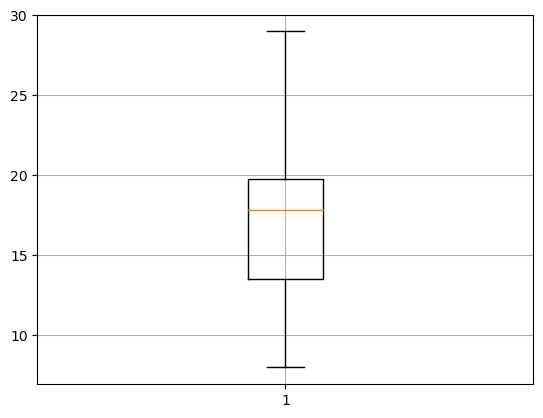

In [10]:
plt.boxplot(data["Delivery Time"])
plt.grid(True)
plt.show()

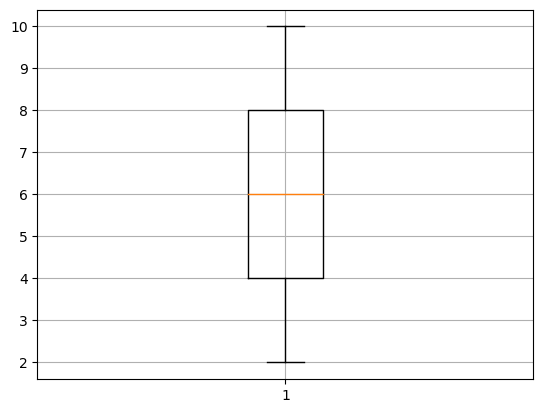

In [11]:
plt.boxplot(data["Sorting Time"])
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


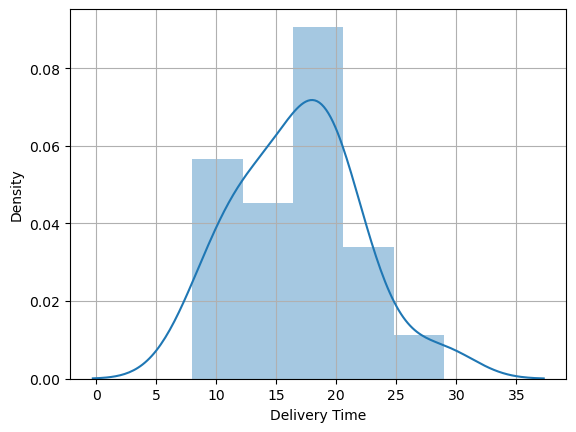

In [12]:
sns.distplot(data["Delivery Time"])
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


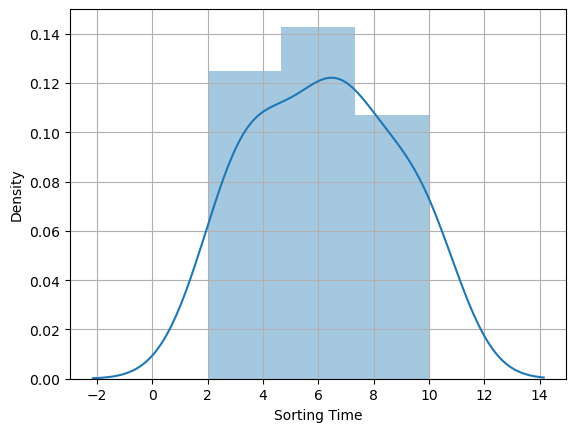

In [13]:
sns.distplot(data["Sorting Time"])
plt.grid(True)
plt.show()

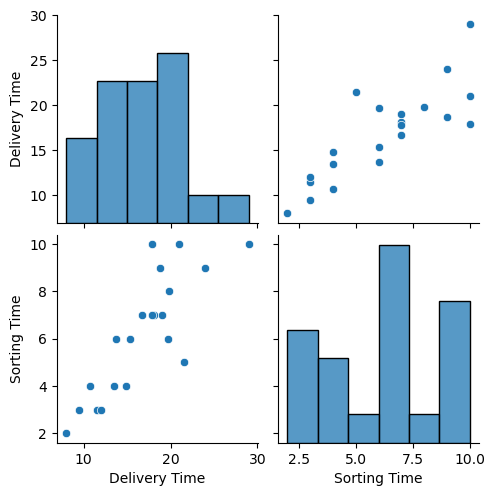

In [14]:
sns.pairplot(data)
plt.grid(True)
plt.show()

In [15]:
data=data.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


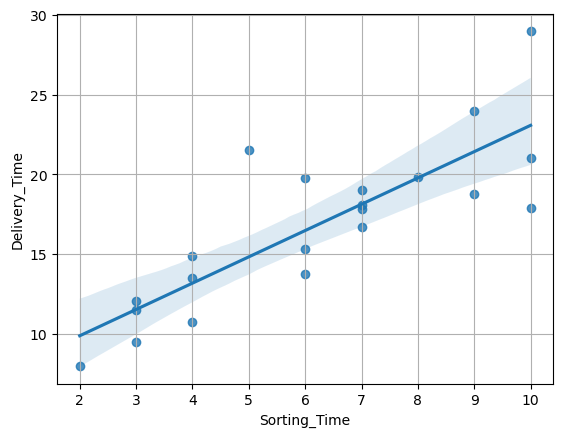

In [17]:
sns.regplot(x=data["Sorting_Time"],y=data["Delivery_Time"])
plt.grid(True)
plt.show()

In [18]:
# Model Building
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()

In [19]:
print(model.params)

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64


In [20]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [21]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [22]:
# Rsquared values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        11:43:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#using log
model1 = smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)",data = data).fit()    

In [25]:
model1.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [26]:
model1.tvalues

Intercept               13.085552
np.log(Sorting_Time)     8.024484
dtype: float64

In [27]:
model1.pvalues

Intercept               5.921137e-11
np.log(Sorting_Time)    1.601539e-07
dtype: float64

In [28]:
model1.rsquared,model1.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 11 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           11:43:27   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model2=smf.ols("Delivery_Time~np.square(Sorting_Time)",data=data).fit()

In [31]:
model2.params

Intercept                  11.237205
np.square(Sorting_Time)     0.124870
dtype: float64

In [32]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [33]:
model2.pvalues

Intercept                  1.415704e-08
np.square(Sorting_Time)    1.739194e-05
dtype: float64

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        11:43:29   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting_Time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model3=smf.ols("Delivery_Time~np.sqrt(Sorting_Time)",data=data).fit()

In [36]:
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [37]:
model3.tvalues

Intercept               -0.840911
np.sqrt(Sorting_Time)    6.592434
dtype: float64

In [38]:
model3.pvalues

Intercept                0.410857
np.sqrt(Sorting_Time)    0.000003
dtype: float64

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        11:43:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Q2) Salary hike -> Build a prediction model for Salary hike

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [6]:
df=pd.read_csv(r"C:\Users\RUTU\Desktop\Data Science\DS_Assignment\Assignment_4\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [44]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [45]:
df.shape

(30, 2)

In [46]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


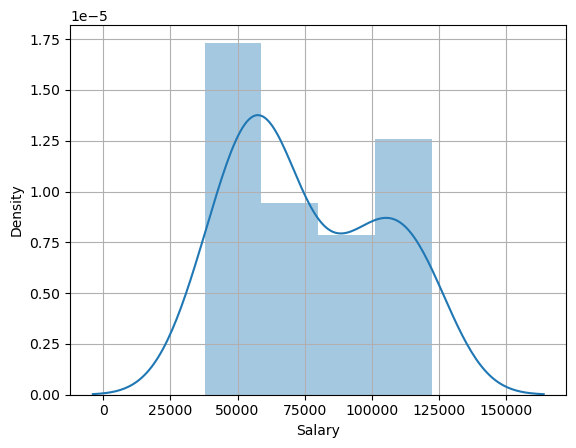

In [47]:
sns.distplot(df["Salary"])
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


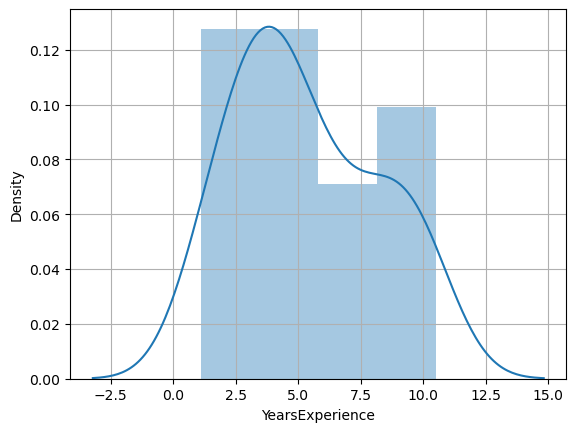

In [48]:
sns.distplot(df["YearsExperience"])
plt.grid(True)
plt.show()

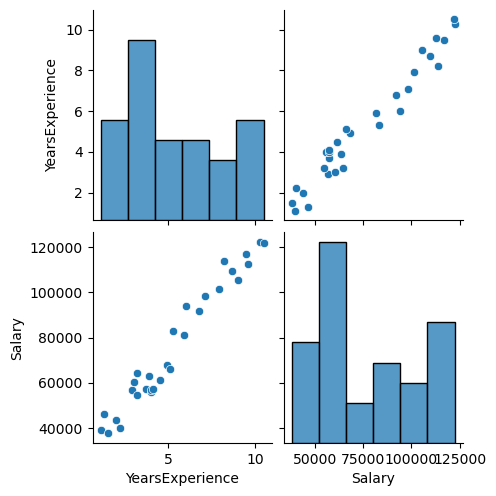

In [49]:
sns.pairplot(df)
plt.show()

In [50]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [51]:
df=df.rename({"YearsExperience":"Experience"},axis=1)
df.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


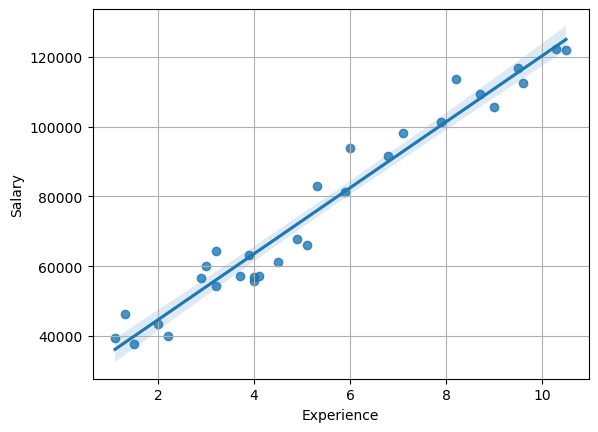

In [52]:
sns.regplot(x=df["Experience"],y=df["Salary"])
plt.grid(True)
plt.show()

In [53]:
# Model building
model=smf.ols("Salary~Experience",data=df).fit()

In [54]:
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [55]:
model.pvalues

Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64

In [56]:
model.tvalues

Intercept     11.346940
Experience    24.950094
dtype: float64

In [57]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        11:48:08   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# predication for Salary hike
df1=pd.Series([3,8])
data_pred=pd.DataFrame(df1,columns=["Experience"])
df1

0    3
1    8
dtype: int64

In [60]:
model.predict(data_pred)

0     54142.087163
1    101391.898770
dtype: float64

In [61]:
model1=smf.ols("Salary~np.log(Experience)",data=df).fit()

In [62]:
model1.params

Intercept             14927.97177
np.log(Experience)    40581.98796
dtype: float64

In [63]:
model1.tvalues

Intercept              2.895135
np.log(Experience)    12.791989
dtype: float64

In [64]:
model1.pvalues

Intercept             7.268813e-03
np.log(Experience)    3.250155e-13
dtype: float64

In [65]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        11:50:13   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model2=smf.ols("Salary~np.square(Experience)",data=df).fit()

In [67]:
model2.params

Intercept                48042.585515
np.square(Experience)      776.318773
dtype: float64

In [68]:
model2.tvalues

Intercept                21.973654
np.square(Experience)    17.397015
dtype: float64

In [69]:
model2.pvalues

Intercept                3.389190e-19
np.square(Experience)    1.518127e-16
dtype: float64

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.52e-16
Time:                        11:51:04   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Experience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
model3=smf.ols("Salary~np.sqrt(Experience)",data=df).fit()

In [72]:
model3.params

Intercept             -16055.769117
np.sqrt(Experience)    41500.680583
dtype: float64

In [73]:
model3.tvalues

Intercept              -3.262308
np.sqrt(Experience)    19.437148
dtype: float64

In [74]:
model3.pvalues

Intercept              2.906965e-03
np.sqrt(Experience)    8.565358e-18
dtype: float64

In [75]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           8.57e-18
Time:                        11:51:57   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Experience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""